In [1]:
pip install qiskit

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install qiskit_aer

Note: you may need to restart the kernel to use updated packages.


In [32]:
!pip install imageio[ffmpeg]

In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [34]:
import numpy as np
from numpy import pi
# importing Qiskit
from qiskit import QuantumCircuit
from qiskit import ClassicalRegister, QuantumRegister
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.rcParams['animation.writer'] = 'ffmpeg'

In [5]:
def sim_sv(qc, text=""):
    """Get the statevector of the output of the circuit qc."""
    # Import necessary modules
    from qiskit_aer import Aer
    from qiskit import transpile
    from qiskit.quantum_info import Statevector

    # Get the statevector simulator backend
    sv_sim = Aer.get_backend('statevector_simulator')

    # Transpile the circuit for the backend
    transpiled_circuit = transpile(qc, sv_sim)

    # Run the circuit and get the result
    result = sv_sim.run(transpiled_circuit).result()

    # Extract the statevector
    sv = result.get_statevector()

    # Optionally, print the statevector in LaTeX format (if vector2latex is available)
    try:
        from qiskit_textbook.tools import vector2latex
        vector2latex(sv, pretext=f"|{text}\\rangle =")
    except ImportError:
        print(f"Statevector for {text}:")
        print(sv)

    return sv

In [6]:
def qft_rotations(circuit, n):
    """Performs QFT on the first n qubits in circuit (without swaps)"""
    for i in range(n):
        circuit.h(i)
        m = 1
        for j in range(i+1, n):
            m = m + 1
            circuit.cp(-2*pi/2**m, j, i)  # Corrected to use cp gate

In [7]:
def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

In [8]:
def makeQFTgate(N):
    """returns a gate of centred QFT, swaps qubits"""
    temp = QuantumCircuit (N)
    swap_registers(temp, N)
    qft_rotations(temp,N)
    temp.x(n-1);
    QFTC = temp.to_gate()
    QFTC.name = "QFT_" + str(N)
    return QFTC

In [9]:
def phase(n, phi):
    """Returns the phase transformation gate for n qubits."""
    qc = QuantumCircuit(n + 1)

    # Apply single-qubit phase gates
    for i in range(n):
        qc.p(phi / (2 ** (i + n - 3)), n - 1 - i)

    # Apply controlled-phase gates
    for i in range(n):
        for j in range(i + 1, n):
            qc.cx(n - 1 - j, n)
            qc.cx(n - 1 - i, n)
            qc.p(phi * (2 ** (2 - i - j)), n)  # Apply phase to the ancilla qubit
            qc.cx(n - 1 - i, n)
            qc.cx(n - 1 - j, n)

    # Convert the circuit to a gate
    phcirc = qc.to_gate()
    phcirc.name = f'phase_{phi}'
    return phcirc

In [ ]:
def evolve(n, phi, initial_state, stepsnumber):
    """Evolve the initial state using QFT and phase gates."""
    n1 = n + 1  # Number of qubits + 1 ancilla qubit
    snaps = []  # List to store snapshots of the state probabilities
    m = 2**7  # Number of steps for each evolution

    for i in range(stepsnumber):
        # Create a quantum circuit
        q = QuantumRegister(n1)
        qc = QuantumCircuit(q)
        qc.barrier()

        # Initialize the circuit with the initial state
        magnitude = np.linalg.norm(initial_state)
        initial_state = initial_state / magnitude  # Normalize the initial state
        qc.initialize(initial_state, list(range(n)))
        qc.barrier()

        # Define gates
        QFT = makeQFTgate(n)  # Quantum Fourier Transform gate
        phkinetic = phase(n, (i + 1) * phi / m)  # Kinetic phase gate
        QFTi = QFT.inverse()  # Inverse QFT
        QFTi.name = f"QFTi_{n}"
        phpotential = phase(n, (i + 1) * phi / (2 * 4 * m))  # Potential phase gate

        # Apply gates
        for j in range(m):
            # QFT
            qc.append(QFT, range(n))
            qc.barrier()

            # Kinetic phase
            qc.append(phkinetic, range(n + 1))
            qc.barrier()

            # Inverse QFT
            qc.append(QFTi, range(n))
            qc.barrier()

            # Potential phase
            qc.append(phpotential, range(n + 1))

        # Simulate the circuit and get the final statevector
        finalstate = sim_sv(qc, '\psi')

        # Convert Statevector to a NumPy array and calculate probabilities
        prob = np.square(np.abs(finalstate.data))  # Use .data to get the underlying array
        snaps.append(prob)

    return snaps

In [11]:
def action ():
    snaps = evolve(n,phi,initial_state, stepsnumber)
    plt.plot(np.square(abs(initial_state)),'r')
    leg = ["initial"]
    for i in range (stepsnumber):
        plt.plot(snaps[i])
        leg. append ("step_"+str(i+1))
    x=plt.axis([0, 2**n-1, 0, 1.1*max(np.square(abs(initial_state)))])
    plt.legend(leg)
    return snaps

In [12]:
from qiskit_aer import Aer
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector

c:\Users\Raysa\anaconda3\Lib\site-packages\qiskit_textbook\tools\__init__.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  out_latex += str(int(np.round(amplitude))) + " \\\\\n"


<IPython.core.display.Math object>

c:\Users\Raysa\anaconda3\Lib\site-packages\qiskit_textbook\tools\__init__.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  out_latex += str(int(np.round(amplitude))) + " \\\\\n"


<IPython.core.display.Math object>

c:\Users\Raysa\anaconda3\Lib\site-packages\qiskit_textbook\tools\__init__.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  out_latex += str(int(np.round(amplitude))) + " \\\\\n"


<IPython.core.display.Math object>

c:\Users\Raysa\anaconda3\Lib\site-packages\qiskit_textbook\tools\__init__.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  out_latex += str(int(np.round(amplitude))) + " \\\\\n"


<IPython.core.display.Math object>

c:\Users\Raysa\anaconda3\Lib\site-packages\qiskit_textbook\tools\__init__.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  out_latex += str(int(np.round(amplitude))) + " \\\\\n"


<IPython.core.display.Math object>

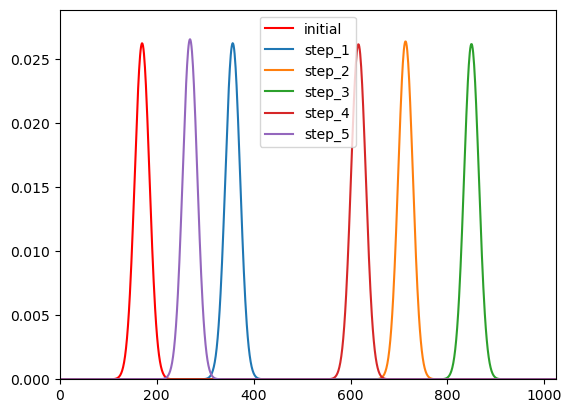

In [13]:
##parameters
n = 10; ## number of qubits
phi = 200*pi; ##time of evolution
#width= 14*2; ## 14*2 works so well centered (splitted) non moving gaussian without x gate (centering) (2 because of doupling potential)
             ## 15.2 + sqrt what works so well for coherent state oscillation with n = 10 and width  phi = 200 * pi
             ## 15.2
width = 15.2; ## this is the correct width;
#initial_state = np.sqrt(np.exp(-(np.linspace(0,2**n-1, 2**n) - (2**n/2) +0.5)**2/(2*width**2))) # n Centred Gaussian
## ground state of harmonic oscillator # actually not an error sqrt of gaussian is gaussian

#initial_state = (np.exp(-(np.linspace(0,2**n-1, 2**n) )**2/(2*width**2))) + (np.exp(-(np.linspace(0,2**n-1, 2**n) -2**n)**2/(2*width**2)))
## removed the sqrt what an error

#initial_state = np.sqrt(np.exp(-(np.linspace(0,2**n-1, 2**n) - (2**n/3) +0.5)**2/(2*15**2)))+np.sqrt(np.exp(-(np.linspace(0,2**n-1, 2**n) - (2*2**n/3) +0.5)**2/(2*15**2)))
# coherent state
initial_state = np.sqrt(np.exp(-(np.linspace(0,2**n-1, 2**n) - (2**n/6) +0.5)**2/(2*15.2**2))) ## biased gaussian

##general energy state
#w=2 #harmonic
#mom = np.zeros(2**n);
#mom[w]=1
#mom [2**n-w]=1
#initial_state= np.fft.fft(mom,2**n)
magnitude = np.linalg.norm(initial_state)
initial_state =initial_state/magnitude

stepsnumber = 5;

snaps=action()


# put x back and recentered the gaussian


In [14]:
from matplotlib.animation import FuncAnimation

In [15]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

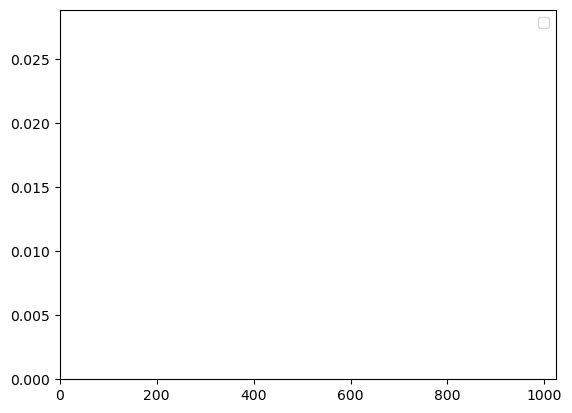

In [16]:

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, (2**n)-1))
ax.set_ylim((0, 1.1*max(np.square(abs(initial_state)))))
plt.legend("step_")

line, = ax.plot([], [], lw=2)

In [17]:
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    plt.legend([])
    return (line,)

In [18]:
# animation function. This is called sequentially
def animate(i):
    #x = np.linspace(0, 1, 2**(n+1))
    x = list(range(2**(n+1)))
    y = snaps[i]
    line.set_data(x, y)
    return (line,)

In [29]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=stepsnumber, interval=100)

In [30]:
HTML(anim.to_html5_video())

RuntimeError: Requested MovieWriter (ffmpeg) not available

In [33]:
ffmpeg -version

NameError: name 'ffmpeg' is not defined